In [1]:
#  Aluno: Joao Pedro Miranda Marques
#  Matricula 2017050495
#  UFMG
#
#  knapsack problem
#  Genetic Algorithm 



#Bibliotecas

import random as rd
import numpy as np
import matplotlib.pyplot

In [14]:
# initializing 
# pop = geneticAlgorithm(knapsackCapacity, numberObjects, numbSubjects, generations, crossover_rate, mutation_rate)
knapsackCapacity = 35 # capacidade de peso da mochila
numberObjects = 8 # quantidade de objetos
numbSubjects = 10 # quantidade de individuos na populacao
generations = 30
crossover_rate = 0.6
mutation_rate = 0.8

In [3]:
 #initialise o vetor de objetos
def init_objects(numberObjects):
    weight = []
    value = []
    objects = np.zeros((2,numberObjects))
    
    for i in range (numberObjects):
        weight.append(rd.randint(1, 10))
        value.append(rd.randint(1, 10))
        
    objects[0] = weight
    objects[1] = value
    
    return objects


 #inicializa individuo (subject)
def init_subject(numberObjects):
    
    subject = []
    
    for i in range (numberObjects):
        subject.append(rd.randrange(0, 2))
        
    return subject

 #inicializa populacao (population)
def init_population(numbSubjects):
    
    population = []
    
    for i in range (0, numbSubjects):
        population.append(init_subject(numberObjects))
        
    return population

    
# allObjs = init_objects(numberObjects)
# print('All Objects:  weight, value')
# print(allObjs)
# subj = init_subject(numberObjects)
# print('One subject')
# print(subj)
# pop = init_population(numbSubjects)
# print('All population')
# print(pop)


In [4]:
#returns the fitness for a given binary chromossome (knapsack configuration)
# subj = subject that is being evaluated
# allOjs = matrix [2 x numberObjects] with weight and values of all objects
# knapsackCapacity = capacity of the knapsack

def fitness_calc(subj, allObjs, knapsackCapacity):
    
    weights = allObjs[0]
    values = allObjs[1]
    
    #penalization factor
    rho = max(values/weights)  
    
    totalBenefit = sum(subj*values)

    totalWeight = sum(subj*weights)

    if totalWeight > knapsackCapacity:
        fit = totalBenefit - rho * (totalWeight - knapsackCapacity)
    else:
        fit = totalBenefit
        
        if fit < 0:
            fit = 0
        
    return fit


#returns array of all fitness
def evaluation(pop, allObjs):
    
    fitnessVector = []
    
    for i in range(0, numbSubjects):
        fitnessVector.append(fitness_calc(pop[i], allObjs, knapsackCapacity))

    return  fitnessVector





# fitnessVector = evaluation(pop)
# print('All fitness')
# print(fitnessVector)


In [5]:

#retorna o um vetor de proportional fitness.
def selection_proportional_fitness(fitnessVector):
    
    totalFitness = sum(fitnessVector)
    PSF = []
    
    for i in range(len(fitnessVector)):
        PSF.append(fitnessVector[i]/totalFitness)
    
    return PSF

 

#retorna dentre 5 solucoes aleatorias as duas melhores.
def selection(pop):
    _aux = 5
    aleatorios = []

    for i in range (_aux):
        aleatorios.append(rd.choice(pop))

    qnt_xeques = [fitness_nq(each_solution) for each_solution in aleatorios]

    m1, m2 = float('inf'), float('inf')

    for x in qnt_xeques:
        if x <= m1:
            m1 = x
            m2 = m1
            indice1 = qnt_xeques.index(m1)
            indice2 = qnt_xeques.index(m2)

    for x in qnt_xeques:
        if x <= m2 and qnt_xeques.index(m1) != qnt_xeques.index(x):
            m2 = x
            indice2 = qnt_xeques.index(m2)
            
    subset_parents = []
    subset_parents.append(aleatorios[indice1])
    subset_parents.append(aleatorios[indice2])
    
#    print("aleatorios: ", aleatorios)
#    print("indice 1 :", indice1)
#    print("indice 2 :", indice2)

    return subset_parents

# propFitArray = selection_proportional_fitness(fitnessVector)
# print('PSF :')
# print(propFitArray)  


In [6]:

#retorna o um vetor de proportional fitness.
def roulette(propFitArray, pop):
    
    nParents = 2
    matingPool = []
    
    j = 0
    while j < nParents:
        r = rd.uniform(0, 1)
        index = 0
        psfCumulative = 0
        
        while psfCumulative < r:
            psfCumulative = psfCumulative +  propFitArray[index]
            index = index + 1
        
        matingPool.append(pop[index - 1])
        j = j + 1
    
    return matingPool


# matingParents = roulette(propFitArray, pop)
# print(' Parents Mating Pool :')
# print(matingParents) 

In [7]:

def crossover(subset_parents, crossover_rate):
#retorna um subset (dois individuos) como resultado do possivel cruzamento dos pais.
    lista1 = subset_parents[0]
    lista2 = subset_parents[1]

    resp1 = []
    resp2 = []
    
   # Crossover com 1 Ponto de Corte aleatorio
   # so acontece se um valor aleatorio entre 1 e 0 for menor que o crossover_rate
    
    #crossover do primeiro par de pais
    prob = rd.uniform(0, 1)
    
    if prob < crossover_rate:
        cut = rd.randint(1, numbSubjects)

        resp1 = lista1[0:cut] + lista2[cut:numbSubjects]
        resp2 = lista2[0:cut] + lista1[cut:numbSubjects]
        
    else:
        resp1 = lista1
        resp2 = lista2

        
    offspring = (resp1, resp2)

    return offspring


# offspring = crossover(matingParents, crossover_rate)
# print(offspring)

In [8]:
def mutation(offspring,mutation_rate):
#retorna um subset (dois individuos) como resultado da mutacao dos filhos.
#Bit Flip com probabilidade entre 0.02 e 0.10
    
    lista1 = offspring[0]
    lista2 = offspring[1]
    
    probRate = rd.uniform(0.02, 0.1)
    prob = rd.uniform(0, 1)
    if prob <= probRate:
        lista1[rd.randint(0,7)] = rd.randint(0,2)
        
    probRate = rd.uniform(0.02, 0.1)
    prob = rd.uniform(0, 1)
    if prob <= probRate:
        lista2[rd.randint(0,7)] = rd.randint(0,2)


    offspring_new = (lista1, lista2)
    
    return offspring_new

# offspring_new = mutation(offspring,mutation_rate)
# print(offspring_new)

In [9]:
#return two worst fitness of fitnessVector
def get_two_worst_fitness(fitnessVector):
    
    index1 = 0
    index2 = 0
    actualworst1 = fitnessVector[index1]
    actualworst2 = fitnessVector[index2]
    
    for i in range(len(fitnessVector)):
        if fitnessVector[i] < actualworst1:
            index1 = i
            actualworst1 = fitnessVector[index1]
            
    for i in range(len(fitnessVector)):
        if actualworst1 < fitnessVector[i] < actualworst2:
            index2 = i
            actualworst2 = fitnessVector[index2]     
            
#     print('fitnessVector :')
#     print(fitnessVector)
#     print('index1, idex2')
#     print(index1, idex2)
            
    return index1, index2



def replacement(offspring_new, pop, fitnessVector):
    
    index1, index2 = get_two_worst_fitness(fitnessVector)

    pop[index1] = offspring_new[0]
    pop[index2] = offspring_new[1]
    
    return pop

# pop = replacement(offspring_new, pop, fitnessVector)
# print(pop)

In [10]:

# loop principal do algoritmo Genetico

def geneticAlgorithm(knapsackCapacity, numberObjects, numbSubjects, generations, crossover_rate, mutation_rate):
    
    i_geracoes = 0
    medias = []
    
    allObjs = init_objects(numberObjects)
    print('All Objects:  weight, value')
    print(allObjs)
    
    pop = init_population(numbSubjects) #initialise
    print('first population: ')
    print(pop)
    

    while i_geracoes <= generations:
    
        fitnessVector = evaluation(pop, allObjs) #fez uma nova avaliacao
        #print("novo evaluation")
        #print(fitnessVector)
        
        propFitArray = selection_proportional_fitness(fitnessVector)
        #print('PSF :')
        #print(propFitArray)  

        subset_parents = roulette(propFitArray, pop) #selecao dos individuos mais aptos para o cruzamento
        #print(' Parents Mating Pool :')
        #print(subset_parents) 

        offspring = crossover(subset_parents, crossover_rate) #cruzamento dos pais
        #print("cruzamento deles crossover")
        #print(offspring)
        
        offspring_new = mutation(offspring,mutation_rate) #mutacao
        #print("mutacao")
        #print(offspring_new)
        
        pop = replacement(offspring_new, pop, fitnessVector) #atualizacao da populacao
        #print("nova populacao")
        #print(pop)


        medias.append(sum(fitnessVector)/generations)

        i_geracoes += 1
        
    
    print("final population:")
    print(pop)
    print("final evaluation: ")
    print(fitnessVector)

    matplotlib.pyplot.xlabel('Interacoes')
    matplotlib.pyplot.ylabel('Media de fitness em uma geracao')
    matplotlib.pyplot.plot(medias)
    
    return pop

All Objects:  weight, value
[[ 3.  1.  3.  1.  2.  3.  9.  8.]
 [ 8.  3.  1. 10.  8.  2.  5.  6.]]
first population: 
[[1, 1, 1, 0, 0, 0, 1, 1], [0, 0, 1, 1, 0, 1, 0, 0], [1, 1, 0, 0, 1, 0, 1, 0], [1, 1, 1, 0, 0, 1, 0, 0], [1, 0, 1, 0, 1, 0, 1, 1], [1, 0, 1, 1, 1, 0, 0, 0], [0, 1, 1, 1, 0, 0, 0, 0], [1, 0, 1, 0, 0, 1, 1, 1], [1, 0, 0, 1, 0, 1, 1, 1], [1, 0, 1, 0, 1, 0, 0, 1]]
final population:
[[1, 1, 0, 0, 1, 1, 1, 2], [1, 1, 0, 0, 1, 1, 1, 2], [1, 1, 0, 0, 1, 1, 1, 1], [1, 1, 0, 0, 1, 1, 1, 1], [1, 1, 0, 0, 1, 1, 1, 1], [1, 1, 0, 0, 1, 1, 1, 1], [1, 1, 0, 0, 1, 1, 1, 1], [1, 1, 0, 0, 1, 1, 1, 1], [1, 1, 0, 0, 1, 1, 1, 1], [1, 1, 0, 0, 1, 1, 1, 1]]
final evaluation: 
[32.0, 38.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0]


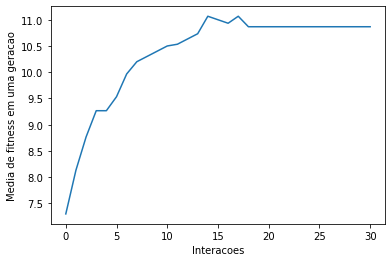

In [23]:
medias = geneticAlgorithm(knapsackCapacity, numberObjects, numbSubjects, generations, crossover_rate, mutation_rate)